In [8]:
import pandas as pd
from openbb import obb
obb.user.preferences.output_type = "dataframe"

In [24]:
data = obb.derivatives.futures.curve(symbol='VX', provider='cboe', date='2024-06-25')

In [23]:
print(data)

   expiration  price
0     2024-11  2.580
1     2024-09  2.020
2     2024-10  2.180
3     2024-12  3.120
4     2025-01  3.410
..        ...    ...
77    2031-04  3.014
78    2031-05  3.034
79    2031-06  2.905
80    2032-04  2.520
81    2032-12  3.720

[82 rows x 2 columns]


<Axes: xlabel='expiration'>

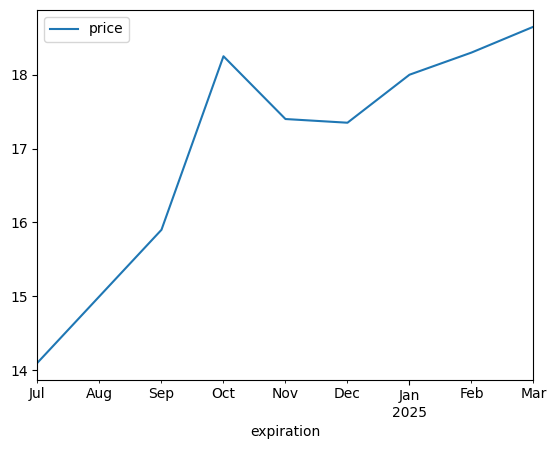

In [25]:
data.index = pd.to_datetime(data.expiration)
data.plot()

In [16]:
expirations = ["2024-12","2025-12","2026-12","2027-12","2028-12","2029-12","2030-12",]

In [19]:
contracts = []
for expiration in expirations:
    df = (
        obb
        .derivatives
        .futures
        .historical(
            symbol="CL",
            expiration=expiration,
            start_date="2020-01-01",
            end_date="2022-12-31"
        )
    ).rename(columns={
        "close": expiration
    })
    contracts.append(df[expiration])

In [20]:
historical = (pd.DataFrame(contracts).transpose().dropna())

In [21]:
print(historical)

              2024-12    2025-12    2026-12    2027-12    2028-12    2029-12  \
date                                                                           
2020-01-24  50.139999  50.700001  51.560001  51.630001  51.630001  51.630001   
2020-01-27  50.599998  51.180000  51.049999  51.119999  51.119999  51.119999   
2020-01-28  50.779999  51.230000  51.549999  51.619999  51.619999  51.619999   
2020-01-29  50.639999  51.130001  51.599998  51.669998  51.669998  51.669998   
2020-01-30  50.910000  51.439999  51.490002  51.560001  51.560001  51.560001   
...               ...        ...        ...        ...        ...        ...   
2024-08-19  72.480003  69.029999  66.699997  65.239998  64.339996  63.709999   
2024-08-20  71.900002  68.389999  66.139999  64.750000  63.919998  63.389999   
2024-08-21  70.809998  67.629997  65.629997  64.440002  63.759998  63.360001   
2024-08-22  71.680000  68.230003  66.050003  64.720001  63.980000  63.509998   
2024-08-23  73.250000  69.459999  66.989

<Axes: >

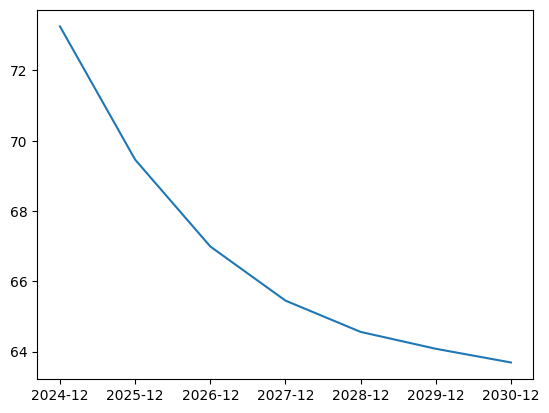

In [26]:
historical.iloc[-1].plot()